#**Night Time Light analysis for Navratri week at 0.05x0.05 degree for Gujarat state with cities Ahmedabad, Nadiad, Vadodara, Surat, Rajkot.**
Analysis at week level




In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
NTL_PATH="ntl/data/" #NTLdata path
COVID_PATH="covidoxford/data/" # covidoxford data path
CITIES_PATH="cities/data/" #cities data path

**total 3418 cities**

In [ ]:
cities_df=pd.read_csv(CITIES_PATH+"cities_0.05degx0.05deg.csv",error_bad_lines=False)
cities_df['population'] = np.where(cities_df['population']==0,10000,cities_df['population'])
print("cities =",len(cities_df))

In [6]:
ntl_df=pd.read_csv(NTL_PATH+"indian_cities_0.05degx0.05deg_ntl.csv")

**Metric Gap_Filled_DNB_BRDF-Corrected_NTL and mean value less than 65535**

In [7]:
metric="Gap_Filled_DNB_BRDF-Corrected_NTL"
metric_df=ntl_df[(ntl_df["metric"]==metric)&(ntl_df["mean"]>=0)&(ntl_df["mean"]<65535)&(~ntl_df["mean"].isna())]

In [8]:
cities=["Ahmedabad","Nadiad","Vadodara","Surat","Rajkot"]

**In 2019 navratri was 29 sept to 7 oct.**<br>
**In 2020 navratri was 17 oct. to 25 oct.**<br>
4 week data for both the years (2 weeks after navratri so than chahnges after that can also be visible


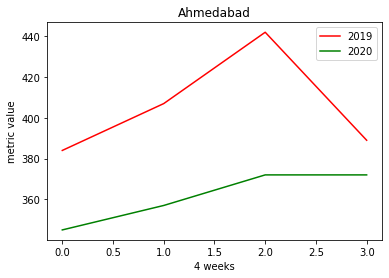

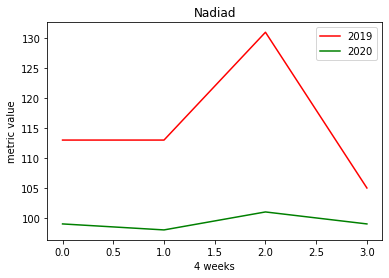

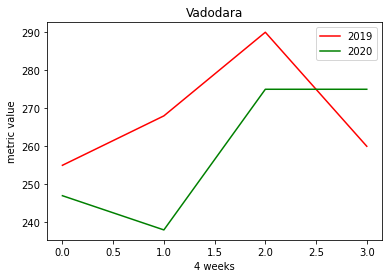

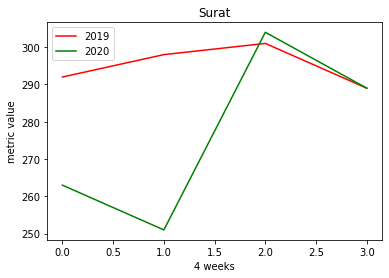

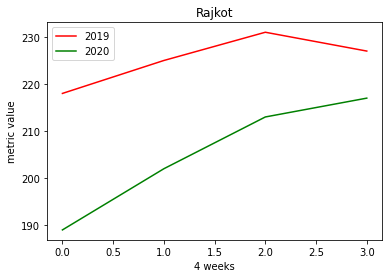

In [10]:
weeks=["9.2019.week3","9.2019.week4","10.2019.week1","10.2019.week2"]
series_2019={}
for city in cities:
    location=cities_df[cities_df["city"]==city]["location"].values[0]
    city_data=metric_df[metric_df["location"]==location].set_index("week")["mean"].to_dict()
    series_2019[city]=[city_data[week] for week in weeks]
weeks=["10.2020.week2","10.2020.week3","10.2020.week4","11.2020.week1"]
series_2020={}
for city in cities:
    location=cities_df[cities_df["city"]==city]["location"].values[0]
    city_data=metric_df[metric_df["location"]==location].set_index("week")["mean"].to_dict()
    series_2020[city]=[city_data[week] for week in weeks]
for city in cities:
    plt.plot(series_2019[city],label="2019",color="red")
    plt.plot(series_2020[city],label="2020",color="green")
    plt.title(city)
    plt.xlabel('4 weeks')
    plt.ylabel('metric value')
    plt.legend()
    plt.show()

**Takeaway**: We can see clear difference in night time light for all cities.